<a href="https://colab.research.google.com/github/AryanBhardwajIndia/employee-salary-prediction/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [8]:
df = pd.read_csv("adult 3.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19235,26,Private,240842,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0.0,40.0,United-States,<=50K
19236,53,Private,103931,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0.0,40.0,United-States,<=50K
19237,60,Private,232618,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,35.0,United-States,>50K
19238,49,Local-gov,288548,Masters,14,Separated,Prof-specialty,Unmarried,White,Female,0,0.0,50.0,United-States,<=50K


In [9]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40.0,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,34,Private,225548,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0.0,30.0,United-States,<=50K
19235,26,Private,240842,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0.0,40.0,United-States,<=50K
19236,53,Private,103931,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0.0,40.0,United-States,<=50K
19237,60,Private,232618,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,35.0,United-States,>50K


In [10]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [12]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0.0,40.0,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0.0,50.0,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0.0,40.0,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0.0,40.0,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0.0,30.0,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,34,2,225548,9,13,2,10,0,2,1,0,0.0,30.0,37,0
19235,26,2,240842,11,9,4,6,4,2,0,0,0.0,40.0,37,0
19236,53,2,103931,15,10,2,9,0,4,1,0,0.0,40.0,37,0
19237,60,2,232618,9,13,2,3,0,4,1,0,0.0,35.0,37,1


In [13]:
for col in df_imputed.columns:
    if col in categorical_cols:
        df_imputed[col] = df_imputed[col].round(0).astype(int)

In [14]:
X = df_imputed.drop('income', axis=1)
y = df_imputed['income']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]


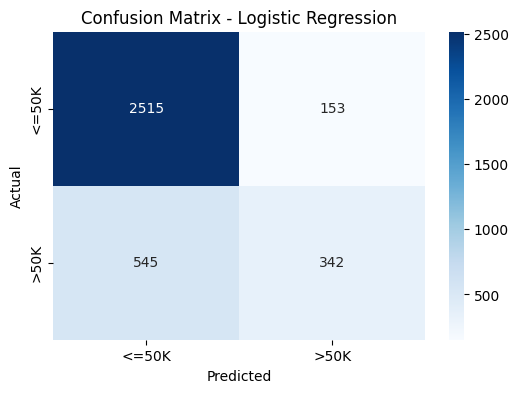

In [18]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

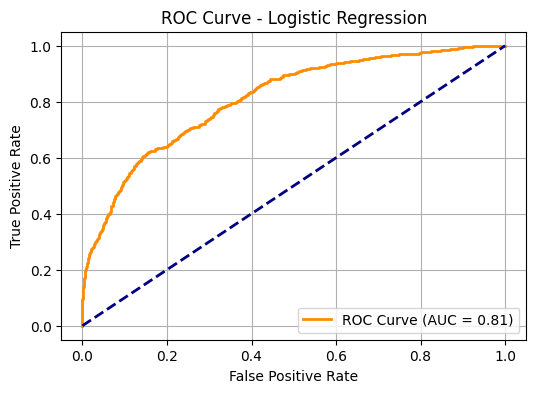

In [19]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [20]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [21]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:23:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.8036568213783404
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2668
           1       0.69      0.39      0.49       887

    accuracy                           0.80      3555
   macro avg       0.76      0.66      0.69      3555
weighted avg       0.79      0.80      0.78      3555

Random Forest Accuracy: 0.8450070323488045
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2668
           1       0.72      0.61      0.66       887

    accuracy                           0.85      3555
   macro avg       0.80      0.77      0.78      3555
weighted avg       0.84      0.85      0.84      3555

XGBoost Accuracy: 0.8559774964838256
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2668
           1       0.75      0.64      0.69       887

    accuracy                           0.86      3555